# 케라스 텍스트 처리 및 임베딩

- 코드 참조: 케라스 창시자에게 배우는 딥러닝



## 용어 설명

- `토큰(token)`
  - 텍스트를 나누는 단위

  - 토큰화(tokenization): 토큰으로 나누는 작업

- `n-gram`
  - 문장에서 추출한 N개(또는 그 이하)의 연속된 단어 그룹

  - 같은 개념이 '문자'에도 적용가능

  <img src="https://www.sqlservercentral.com/wp-content/uploads/legacy/0bf6a2bd621db172dba029ce3c712280a3f6aab3/29444.jpg">

  <sub>출처: https://www.sqlservercentral.com/articles/nasty-fast-n-grams-part-1-character-level-unigrams</sub>

## 문자 수준 원-핫 인코딩

In [5]:
import numpy as np

samples = ['The cat sat on the mat.',
           'The dog ate my homework.']

token_index = {}

In [7]:
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

print(token_index)

max_len = 10
results = np.zeros(shape=(len(samples),
                          max_len,
                          max(token_index.values()) + 1))


{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [8]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_len]:
        index = token_index.get(word)
        results[i, j, index] = 1.

results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

## 케라스를 사용한 단어 수준 원-핫 인코딩

- `fit_on_texts()`

- `texts_to_sequences()`

- `texts_to_matrix()`

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.',
           'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index)) # 위에는 10개

9개의 고유한 토큰을 찾았습니다.


In [10]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [11]:
print(one_hot_results.shape)
print(one_hot_results)

(2, 1000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

### 토큰화 예제

- `OOV` : Out of Vocabulary
  - 새로운 문장에서 기존에 토큰화한 문장에 존재하지 않으면 OOV로 대체됨

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ["I'm the smartest student.",
           "I'm the best student."]

tokenizer = Tokenizer(num_words=10, oov_token='<OOV>')
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

binary_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index

print(word_index) # 순서대로 안나오는 이유

{'<OOV>': 1, "i'm": 2, 'the': 3, 'student': 4, 'smartest': 5, 'best': 6}


In [16]:
binary_results

array([[0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 0.]])

테스트

In [19]:
test = ["I'm the best student ever."]
test_seq = tokenizer.texts_to_sequences(test)

In [20]:
print('word_index:', tokenizer.word_index)
print('test text:', test)
print('test_seq:', test_seq)

word_index: {'<OOV>': 1, "i'm": 2, 'the': 3, 'student': 4, 'smartest': 5, 'best': 6}
test text: ["I'm the best student ever."]
test_seq: [[2, 3, 6, 4, 1]]


## 원-핫 단어 벡터와 단어 임베딩

- `원-핫 단어 벡터`
  - 데이터가 희소(sparse)

  - 고차원

- `단어 임베딩`
  - 밀집(dense)

  - 저차원

  <img src="https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_02.png" width="400">

  <sub>출처: https://freecontent.manning.com/deep-learning-for-text/</sub>

## 단어 임베딩
- 단어간 벡터사이의 **거리가 가까운**, 즉 비슷한 단어들끼리 임베딩

- 거리 외에 임베딩 공간의 특정 방향도 의미를 가질 수 있음


<img src="https://miro.medium.com/max/3010/1*OEmWDt4eztOcm5pr2QbxfA.png">

<sub>출처: https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8</sub>


## Embedding Layer

- 특정 단어를 나타내는 정수 인덱스를 밀집 벡터(dense vector)로 매핑하는 딕셔너리 레이어

- 입력: `(samples, sequence_length)`

- 출력: `(samples, sequnece_length, dim)`

In [21]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000, 64)
embedding_layer

<Embedding name=embedding, built=False>

## 예제 : IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [22]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

### 데이터 로드

In [24]:
num_words = 1000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [26]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [27]:
for i in range(10):
    if y_train[i] == 0:
      label = '부정'
    else:
      label = '긍정'
    print(label, ':', x_train[i])

긍정 : [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
부정 : [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 11

### (참고) IMDB 데이터셋에서 가장 많이 사용된 단어

In [28]:
word_index = {}

for key, val in imdb.get_word_index().items():
    word_index[val] = key

for i in range(1, 6):
    print(word_index[i])


the
and
a
of
to


### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 짧으면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [30]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
20


In [31]:
print(x_train[0])
print(pad_x_train[0]) # 짜른 기준이 뭐지??

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[ 65  16  38   2  88  12  16 283   5  16   2 113 103  32  15  16   2  19
 178  32]


### 모델 구성

In [32]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일 및 학습

In [33]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [34]:
history = model.fit(pad_x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5814 - loss: 0.6719 - val_acc: 0.7026 - val_loss: 0.5656
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7424 - loss: 0.5239 - val_acc: 0.7250 - val_loss: 0.5360
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7666 - loss: 0.4808 - val_acc: 0.7236 - val_loss: 0.5319
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7819 - loss: 0.4538 - val_acc: 0.7222 - val_loss: 0.5403
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7908 - loss: 0.4407 - val_acc: 0.7292 - val_loss: 0.5351
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8121 - loss: 0.4114 - val_acc: 0.7238 - val_loss: 0.5447
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8231 - loss: 0.3953 - val_acc: 0.7226 - val_loss: 0.5582
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8416 - loss: 0.3680 - val_acc: 0.7178 - val_loss: 0.5681
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - ac

### 시각화

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


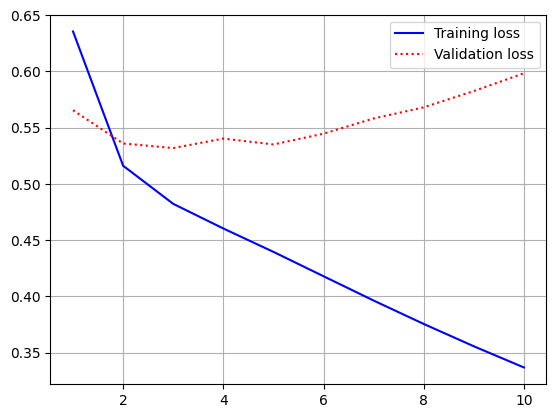

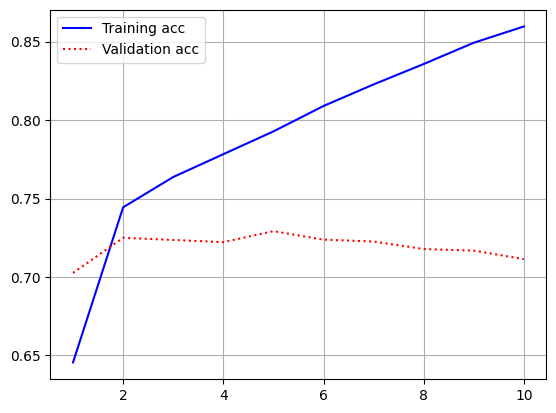

In [36]:
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r:', label='Validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r:', label='Validation acc')
plt.legend()
plt.grid()
plt.show()

### 모델 평가

In [37]:
model.evaluate(pad_x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - acc: 0.7071 - loss: 0.6030


[0.5964224338531494, 0.7112799882888794]

### 단어의 수를 늘린 후 재학습

In [38]:
num_words = 1000
max_len = 500

pad_x_train2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test2 = pad_sequences(x_test, maxlen=max_len, padding='pre')

데이터 확인

In [39]:
print(x_train[0])
print(pad_x_train2[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [40]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history2 = model.fit(pad_x_train2, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6124 - loss: 0.6375 - val_acc: 0.8286 - val_loss: 0.3923
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8426 - loss: 0.3620 - val_acc: 0.8280 - val_loss: 0.3866
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8784 - loss: 0.2932 - val_acc: 0.8302 - val_loss: 0.3923
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8998 - loss: 0.2485 - val_acc: 0.8370 - val_loss: 0.3828
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9318 - loss: 0.1872 - val_acc: 0.8332 - val_loss: 0.3994
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9497 - loss: 0.1494 - val_acc: 0.8318 - val_loss: 0.4221
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9649 - loss: 0.1175 - val_acc: 0.8258 - val_loss: 0.4679
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9760 - loss: 0.0887 - val_acc: 0.8208 - val_loss: 0.4973
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - ac

In [42]:
import matplotlib.pyplot as plt

history_dict2 = history2.history
print(history_dict.keys())

loss = history_dict2['loss']
val_loss = history_dict2['val_loss']
acc = history_dict2['acc']
val_acc = history_dict2['val_acc']

epochs = range(1, len(loss) + 1)

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


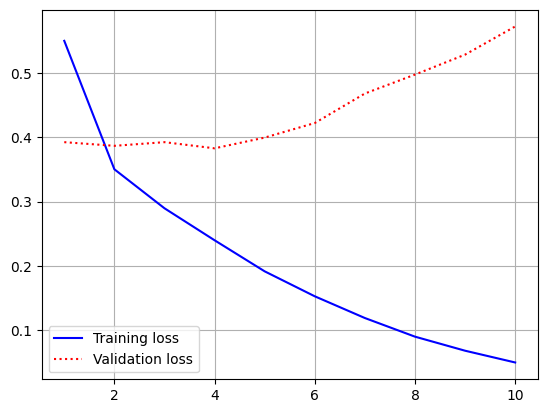

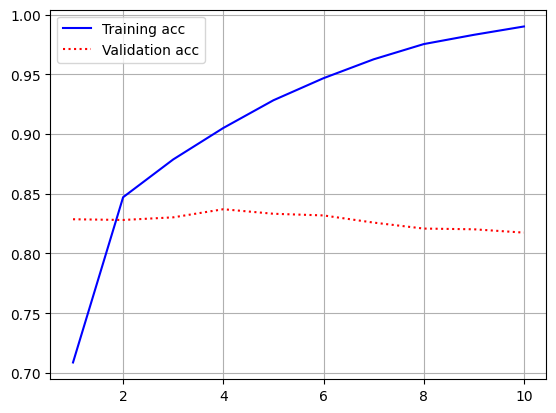

In [43]:
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r:', label='Validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r:', label='Validation acc')
plt.legend()
plt.grid()
plt.show()

In [44]:
model.evaluate(pad_x_test2, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - acc: 0.8222 - loss: 0.5477


[0.5471149682998657, 0.8234800100326538]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## 단어 임베딩의 종류
- LSA

- Word2Vec

- GloVe

- FastText

- etc..

<!-- ## 사전 훈련된 모델
https://github.com/Hironsan/awesome-embedding-models#pre-trained-word-vectors -->

## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

### 구텐베르크 프로젝트 예제
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

In [45]:
import requests
import re

### 데이터 다운로드

In [46]:
res = requests.get('http://www.gutenberg.org/files/2591/2591-0.txt')

### 데이터 전처리

In [47]:
grimm = res.text[2801:530661]
grimm = re.sub(r'[^a-zA-z\.]', ' ', grimm)
sentences = grimm.split('. ')
data = [s.split() for s in sentences]

In [48]:
len(data)

3468

In [49]:
data[0]

['SECOND',
 'STORY',
 'THE',
 'SALAD',
 'THE',
 'STORY',
 'OF',
 'THE',
 'YOUTH',
 'WHO',
 'WENT',
 'FORTH',
 'TO',
 'LEARN',
 'WHAT',
 'FEAR',
 'WAS',
 'KING',
 'GRISLY',
 'BEARD',
 'IRON',
 'HANS',
 'CAT',
 'SKIN',
 'SNOW',
 'WHITE',
 'AND',
 'ROSE',
 'RED',
 'THE',
 'BROTHERS',
 'GRIMM',
 'FAIRY',
 'TALES',
 'THE',
 'GOLDEN',
 'BIRD',
 'A',
 'certain',
 'king',
 'had',
 'a',
 'beautiful',
 'garden',
 'and',
 'in',
 'the',
 'garden',
 'stood',
 'a',
 'tree',
 'which',
 'bore',
 'golden',
 'apples']

`gensim` 패키지로부터 WordVec을 불러오기

In [51]:
from gensim.models.word2vec import Word2Vec

`sg` 인자에 0을 넘겨주면 CBOW, 1을 넘겨주면 Skip-gram

In [52]:
model = Word2Vec(data, sg=1, vector_size=100, window=3, min_count=3, workers=4)

### 모델 저장 및 로드

In [53]:
model.save('word2vec.model')

In [54]:
pretrained_model = Word2Vec.load('word2vec.model')

### 단어를 벡터로 변환
- `wv`

In [55]:
pretrained_model.wv['princess']

array([-0.12417696,  0.13143969,  0.08471574,  0.2130082 , -0.01254607,
       -0.33003995,  0.17874098,  0.5376661 , -0.18763138, -0.0783434 ,
       -0.01111855, -0.24133834, -0.03830223,  0.21427327,  0.02198627,
       -0.22413959,  0.08466358, -0.31327945, -0.01787804, -0.3493676 ,
        0.11327072,  0.0899285 ,  0.18434098, -0.10836067,  0.14663824,
       -0.06380378, -0.06502759,  0.02647705, -0.00724996, -0.07762552,
        0.03116618, -0.02260992,  0.21928458, -0.15104774, -0.01479691,
        0.16750719, -0.00147564, -0.04834011, -0.13199514, -0.16823857,
       -0.01224228, -0.16002703, -0.04128069,  0.03749553,  0.02629786,
        0.08784956, -0.19971816, -0.1748703 ,  0.20171438,  0.04687404,
        0.11332445, -0.11488077, -0.06271812, -0.01710295,  0.05298222,
        0.02569976,  0.12987484,  0.08738696, -0.18215014,  0.01393691,
        0.09834168,  0.04770513,  0.024411  , -0.03319447, -0.23160489,
        0.36954245,  0.05542956,  0.22515671, -0.31849417,  0.26

### 유추 또는 유비(analogy)
- `wv.similarity()`에 두 단어를 넘겨주면 코사인 유사도를 구할 수 있음

In [65]:
pretrained_model.wv.similarity('king', 'man')

0.9070399

- `wv.most_similar()`에 단어를 넘겨주면 가장 유사한 단어를 추출할 수 있음

In [66]:
pretrained_model.wv.most_similar('king')

[('daughter', 0.9304121136665344),
 ('son', 0.9301179647445679),
 ('woman', 0.9211077690124512),
 ('man', 0.9070398211479187),
 ('fox', 0.8818628787994385),
 ('miller', 0.8778377175331116),
 ('cook', 0.8691607713699341),
 ('queen', 0.8680206537246704),
 ('boy', 0.8577591776847839),
 ('young', 0.8550867438316345)]

- `wv_most_similar()`에 `positive`와 `negative`라는 옵션을 넘길 수 있음

In [69]:
pretrained_model.wv.most_similar(positive=['man', 'prince'], negative=['woman'])

[('cow', 0.9589031934738159),
 ('lion', 0.9542911052703857),
 ('giant', 0.9515944123268127),
 ('husband', 0.9495589733123779),
 ('friend', 0.9476664662361145),
 ('mouse', 0.9474453926086426),
 ('word', 0.947316586971283),
 ('cat', 0.9464669227600098),
 ('grandmother', 0.9461795687675476),
 ('master', 0.9453179240226746)]

### gensim으로 학습된 단어 임베딩을 Keras에서 불러오기

In [70]:
from keras.models import Sequential
from keras.layers import Embedding

In [71]:
num_words, emb_dim = pretrained_model.wv.vectors.shape

print(num_words)
print(emb_dim)

2446
100


### gensim으로 학습된 단어 임베딩을 케라스의 임베딩 레이어의 가중치로 설정

In [72]:
emb = Embedding(input_dim=num_words, output_dim=emb_dim,
                trainable=False, weights=[pretrained_model.wv.vectors])

In [73]:
model = Sequential()
model.add(emb)

In [74]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │       244,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,600 (955.47 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 244,600 (955.47 KB)

In [75]:
i = pretrained_model.wv.index_to_key.index('princess')

In [76]:
model.predict(np.array([[i]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[[-0.12417696,  0.13143969,  0.08471574,  0.2130082 ,
         -0.01254607, -0.33003995,  0.17874098,  0.5376661 ,
         -0.18763138, -0.0783434 , -0.01111855, -0.24133834,
         -0.03830223,  0.21427327,  0.02198627, -0.22413959,
          0.08466358, -0.31327945, -0.01787804, -0.3493676 ,
          0.11327072,  0.0899285 ,  0.18434098, -0.10836067,
          0.14663824, -0.06380378, -0.06502759,  0.02647705,
         -0.00724996, -0.07762552,  0.03116618, -0.02260992,
          0.21928458, -0.15104774, -0.01479691,  0.16750719,
         -0.00147564, -0.04834011, -0.13199514, -0.16823857,
         -0.01224228, -0.16002703, -0.04128069,  0.03749553,
          0.02629786,  0.08784956, -0.19971816, -0.1748703 ,
          0.20171438,  0.04687404,  0.11332445, -0.11488077,
         -0.06271812, -0.01710295,  0.05298222,  0.02569976,
          0.12987484,  0.08738696, -0.18215014,  0.01393691,
          0.09834168,  0.04770513,  0.024411  , -0.03319447,
         -0.23160489,  0

## Keras에서 Word2Vec 직접 학습
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

### 데이터 준비

In [77]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data()

- 단어 번호와 단어의 관계를 사전으로 만듦

- 1번은 문장의 시작, 2번은 사전에 없는 단어(OOV)로 미리 지정

In [79]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [80]:
index_word = {idx+3: word for word, idx in word_index.items()}

In [81]:
index_word[1] = '<start>'
index_word[2] = '<unknown>'

In [82]:
' '.join(index_word[i] for i in x_train[0])

"<start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [83]:
num_words = max(index_word) + 1

### 텍스트를 단어 번호로 바꾸기

In [84]:
texts = []
for data in x_train:
  text = ' '.join(index_word[i] for i in data)
  texts.append(text)

In [87]:
len(texts)

25000

- `Tokenizer`를 사용해 텍스트를 단어로 바꿈

In [88]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [89]:
tok = Tokenizer()
tok.fit_on_texts(texts)

new_data = tok.texts_to_sequences(texts)
new_data[0][:10] # 아래랑 두개가 다른 이유?

[28, 11, 19, 13, 41, 526, 968, 1618, 1381, 63]

In [90]:
x_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

### 단어쌍 만들기

In [91]:
from tensorflow.keras.preprocessing.sequence import make_sampling_table, skipgrams

VOCAB_SIZE  = len(tok.word_index)
print(VOCAB_SIZE)

88581


- 단어를 무작위로 추출하면 자주 나오는 단어가 더 많이 나오게됨

- 이를 방지하기위해 단어를 추출할 확률의 균형을 맞춘 샘플링 표를 생성

In [92]:
table = make_sampling_table(VOCAB_SIZE)

- 두 단어씩 뽑아 좌우 2단어(`window_size=2`)안에 들어있는 경우가 있는지 없는지 확인하여 데이터를 생성

In [93]:
couples, labels = skipgrams(data, VOCAB_SIZE, window_size=2, sampling_table=table)

In [94]:
couples[:5]

[[2098, 29654], [8368, 87083], [405, 101], [2098, 405], [9685, 6139]]

- `labels`에는 윈도우 안에 들어있는 경우가 있으면 1, 없으면 0

In [95]:
labels[:5]

[0, 0, 1, 1, 1]

- 대상 단어는 `word_target`으로, 맥락 단어는 `word_context`로 모음

In [96]:
word_target, word_context = zip(*couples)

- 배열로 바꾼다.

In [98]:
word_target = np.asarray(word_target, dtype='int32')
word_context = np.asarray(word_context, dtype='int32')
labels = np.asarray(labels, dtype='int32')

In [99]:
word_target.shape

(272,)

In [100]:
word_context.shape

(272,)

### Skip-gram 모형

- Skip-gram 모형은 함수형 API를 사용해야 함

In [101]:
from tensorflow.keras.layers import Activation, Dot, Embedding, Flatten, Input, Reshape
from tensorflow.keras.models import Model

In [102]:
def build_model():
    input_target = Input(shape=(1,))
    input_context = Input(shape=(1,))

    emb = Embedding(input_dim=VOCAB_SIZE, output_dim=8)
    target = emb(input_target)
    context = emb(input_context)

    dot = Dot(axes=2)([target, context])
    flatten = Reshape((1,))(dot)
    output = Activation('sigmoid')(flatten)

    skipgram = Model(inputs=[input_target, input_context], outputs=output)

    return skipgram

In [103]:
model = build_model()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 1, 8)      │    708,648 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1, 1)      │          0 │ embedding_4[0][0… │
│                     │                   │            │ embedding_4[1][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1)         │          0 │ dot[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1)         │          0 │ reshape[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 708,648 (2.70 MB)

 Trainable params: 708,648 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일 및 학습

In [104]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit([word_target, word_context], labels, epochs=30)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4567 - loss: 0.6931  
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5890 - loss: 0.6928
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7071 - loss: 0.6924
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7702 - loss: 0.6919 
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8619 - loss: 0.6915 
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9228 - loss: 0.6907
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9004 - loss: 0.6900
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9473 - loss: 0.6890 
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9742 - loss: 0.6878
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9714 - loss: 0.6861 
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9909 - loss: 0.6844 
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9885 - loss: 0.6823 
Epoc

### 임베딩 레이어 저장 및 로드

In [105]:
emb = model.layers[2]

In [106]:
emb.get_weights()

[array([[-0.01083937,  0.04047922,  0.01964029, ...,  0.04459696,
         -0.00045272, -0.04199777],
        [-0.02689885,  0.02130233,  0.03962186, ..., -0.03560372,
          0.03307935,  0.03955176],
        [ 0.02211699, -0.04365204, -0.00269835, ...,  0.01209824,
          0.02746416, -0.02770383],
        ...,
        [-0.04596616,  0.02471882,  0.01906793, ..., -0.02994674,
          0.0109111 , -0.01895323],
        [-0.03556548, -0.02058005, -0.02698201, ..., -0.0343134 ,
         -0.01990497,  0.04249343],
        [-0.03324982, -0.04970095, -0.00718348, ..., -0.02745894,
          0.00767623, -0.00050183]], dtype=float32)]

In [107]:
np.save('emb.npy', emb.get_weights()[0])

- 임베딩 레이어 로드

In [108]:
w = np.load('emb.npy')

In [109]:
w.shape

(88581, 8)

- 임베딩 레이어를 추가할때 `trainable`를 `False`로 하면 추가학습이 이루어 지지 않는다.

In [110]:
num_words

88588

In [111]:
emb_ff = Embedding(input_dim=VOCAB_SIZE, output_dim=8,
                   input_length=30, weights=[w], trainable=False)

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## 사전 훈련된 단어 임베딩 사용하기 : GloVe 임베딩

- 코드 출처: 케라스 창시자에게 배우는 딥러닝

### 원본 IMDB 텍스트 내려받기
- http://mng.bz/0tIo

In [113]:
!wget --no-check-certificate http://mng.bz/0tIo

--2024-08-16 10:27:01--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 54.148.47.75, 54.214.168.24, 52.33.202.248, ...
Connecting to mng.bz (mng.bz)|54.148.47.75|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz:443/0tIo [following]
--2024-08-16 10:27:01--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|54.148.47.75|:443... connected.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2024-08-16 10:27:02--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.164.56, 54.231.161.240, 16.182.108.56, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.164.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: '0tIo'

     0K .......... .......... .......... .......... ..........  0%  720K 82s
    50K .......... .......... .......... .....

In [114]:
!mkdir '/content/dataset'
!unzip '/content/0tIo' -d '/content/dataset'

���� ������ �ùٸ��� �ʽ��ϴ�.
'unzip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
import os

imdb_dir = '/dataset/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels=[]
texts=[]

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)

    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()

        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [ ]:
texts[0]

In [ ]:
labels[0]

### 데이터 토큰화

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

In [ ]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [ ]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

### GloVe 단어 임베딩 내려받기

- https://nlp.stanford.edu/projects/glove

- http://nlp.stanford.edu/data/glove.6B.zip

- 시간 소요 (5~7m)

In [ ]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
!mkdir '/content/dataset'
!unzip '/content/glove.6B.zip' -d '/content/dataset/glove'

### 임베딩 전처리
- GloVe 파싱

In [ ]:
glove_dir = '/content/dataset/glove'

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print(len(embedding_index))

In [ ]:
embedding_dim = 100
max_words = 10000

embedding_mat = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_mat[i] = embedding_vector

In [ ]:
embedding_mat

### 모델 정의

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [ ]:
model = Sequential()

embedding_layer = Embedding(max_words, embedding_dim, input_length=max_len)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                   epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

In [ ]:
model.save_weights(filepath='pre_trained_glove_model.weights.h5')

### 시각화

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.grid()


plt.figure()
plt.plot(epochs, acc, 'b--', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.legend()
plt.grid()


plt.show()

## 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련

In [ ]:
model2 = Sequential()

model2.add(Embedding(max_words, embedding_dim, input_length=max_len))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

In [ ]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train,
                   epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.grid()


plt.figure()
plt.plot(epochs, acc, 'b--', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.legend()
plt.grid()


plt.show()

### 테스트 데이터 토큰화

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels=[]
texts=[]

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)

    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()

        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

In [ ]:
print(x_test.shape)
print(y_test.shape)

In [ ]:
model.load_weights('pre_trained_glove_model.weights.h5')
model.evaluate(x_test, y_test)